In [1]:
import pandas as pd
import ast

In [2]:
data = pd.read_csv('data/countTable.0.CTCF_ESAJ_TAGCGA20NGCT.tsv.gz', sep='\t', header=None) # ['sequence', 'round.0', 'round.1']) #  header=False)
data.columns = ['seq', 0, 1, 2, 3, 4]

In [3]:
data_ctcf_exp1 = pd.read_csv('data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None) # ['sequence', 'round.0', 'round.1']) #  header=False)
data_ctcf_exp1.columns = ['seq', 0, 1]

In [4]:
data_ctcf_exp1.shape

(120096, 3)

In [5]:
# read log
log = 'probound_output_example1.txt'
json_path = 'probound_model_example1.json'
lines = [r.strip() for r in open(log)]

In [6]:
import json

with open(json_path) as json_reader:
    json_obj = json.load(json_reader)
    json_reader.close()

In [7]:
from sklearn import metrics
import logomaker
import matplotlib.pyplot as plt

In [8]:
models_by_fitting = []
act_by_fitting = {}
fitting_i = -1

for m in json_obj['coefficients']['bindingModes']:
    print('model')
    print(m['mononucleotide'])
    
    df = pd.DataFrame(map(float, m['mononucleotide']))
    df = pd.DataFrame(df.values.reshape(int(df.shape[0] / 4), 4))
    df = df.T
    df.index = 'A', 'C', 'G', 'T'
    act = m['activity'][0]
    models_by_fitting.append([df, act])                    
    print(df)
    print(act)
    print('')

model
[]
Empty DataFrame
Columns: []
Index: [A, C, G, T]
[-3.205441092954406e-14, -0.7879411363275897]

model
[-1.2367155211747507, 0.8345276995061088, -0.6759880817405535, -0.47761631953722566, -1.1031738285733064, -0.9228000402177465, 1.0803608826116062, -0.6101792367989115, -0.6623942121515632, 1.235582641856006, -0.5077624211017717, -1.6212182315776884, -1.1727982749517842, 1.6043011168661243, -0.9980332917303202, -0.9892617731627522, -0.07504203804557914, 0.8564686850482643, -1.1193463965134376, -1.2178724734649462, -1.0710302803991305, 1.0063182553631218, -1.4803851532740617, -0.010695044664580686, -0.9751186680593396, 1.6852380506172782, -1.2490441039253615, -1.0168675016123112, -0.8383771400517754, -0.5781739406745541, -1.2413125565617875, 1.1020714143104817, 0.4815915269377371, -1.0464573337499596, -0.32223365202885995, -0.668692764136674, -1.2235424245106592, -0.35177408422041395, 0.6209590264632225, -0.6014347407088009, -0.4234103004211573, 0.0457545954450697, -1.01108657197

In [9]:
# read simplified position bias
s = 'Position Bias(exp=0, s=0): {-1.1989,-0.1109,-0.1645,-0.1730,0.8986,-0.3011,0.3583,0.3991,-0.0611,0.4818,-0.3062,0.5433,0.1552,0.6957,-0.6806,0.4288,-0.5763,0.5128,-0.0870,-0.0503,0.5725,-1.4682,-0.0507,0.1678,0.1012,-0.3571,0.1313,-0.5716,-0.5057,0.6293}'
pbias = list(map(float, s.split(':')[1].strip()[1:-1].split(',')))


In [10]:
# models_by_fitting[i][0]

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


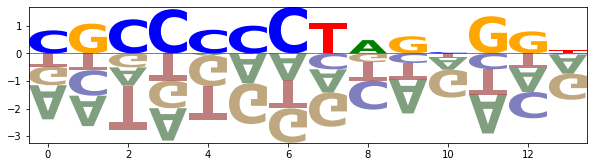

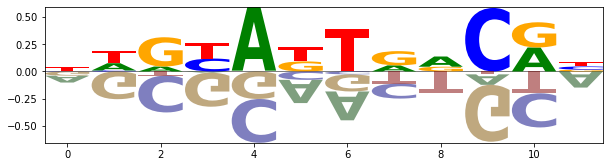

In [11]:
for m, act in models_by_fitting:
    if m.shape[1] == 0:
        continue
    crp_logo = logomaker.Logo(m.T,
                  shade_below=.5,
                  fade_below=.5,
                  font_name='Arial Rounded MT Bold')
    plt.show()

In [12]:
data = data_ctcf_exp1

In [13]:
# data = data.sort_values(4, ascending=False).reset_index(drop=True)

In [14]:
    
def get_score(s, m, pbias=None):
    k = m.shape[1]
    total_score = 0
    for si in range(len(s) - k + 1):
        kmer = s[si: si + k]
        scores = [m.loc[nt, pi] for pi, nt in enumerate(kmer)]
        if pbias is not None:
            scores = [m.loc[nt, pi] * pbias[pi] for pi, nt in enumerate(kmer)]
        
        kmer_rev = str(Seq(kmer).reverse_complement())
        scores += [m.loc[nt, pi] for pi, nt in enumerate(kmer_rev)]
        
        total_score += sum(scores)
    return total_score

def get_likelihood(y, yi):
    ret

In [119]:
k_ir = data_sample[0]
f_ir = data_sample[1]
mu_r = 1.0

# equation = sum([k_{i,r}) * log(mu_r * f_{i,r}) - mu_{i,r} * f_{i,r}]

term_a = k_ir * np.log(mu_r * (k_ir + 1e-15))
term_b = mu_r * f_ir

print(np.sum(term_a - term_b))

-51655.11522969417


In [15]:
import seaborn as sns

<AxesSubplot:>

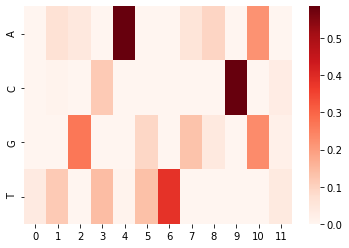

In [16]:
sns.heatmap(m, cmap='Reds', vmin=0)

In [17]:
n = 300
# data = data.sort_values(4, ascending=False)
# data_ctcf_exp1 = data_ctcf_exp1.sort_values(1, ascending=False)
# data_sample = pd.concat([data_ctcf_exp1.head(n), data_ctcf_exp1.tail(n)])
data_sample = data.copy()

In [18]:
data.shape

(120096, 3)

In [19]:
data_sample

,seq,0,1
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1
...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0


In [20]:
from Bio.Seq import Seq
print('done...')

done...


In [21]:
y = []
scores_df = pd.DataFrame()
binding_mode_i = 1
for m, act in models_by_fitting: # [-2:-1]:
    
    scores_mi = []
    for ri, r in data_sample.iterrows():
        score = get_score(r['seq'], m, pbias=pbias if binding_mode_i==1 else None)
        score = score * act[-1]
        # score = np.random.random()
        # score = 1 # 0.0
        scores_mi.append(score)        

        # y.append(yi)
        if ri % 10000 == 0:
            print(ri, 'out of', data_sample.shape[0])
    scores_df['m%i' % binding_mode_i] = scores_mi
    binding_mode_i += 1
    


0 out of 120096
10000 out of 120096
20000 out of 120096
30000 out of 120096
40000 out of 120096
50000 out of 120096
60000 out of 120096
70000 out of 120096
80000 out of 120096
90000 out of 120096
100000 out of 120096
110000 out of 120096
120000 out of 120096
0 out of 120096
10000 out of 120096
20000 out of 120096
30000 out of 120096
40000 out of 120096
50000 out of 120096
60000 out of 120096
70000 out of 120096
80000 out of 120096
90000 out of 120096
100000 out of 120096
110000 out of 120096
120000 out of 120096
0 out of 120096
10000 out of 120096
20000 out of 120096
30000 out of 120096
40000 out of 120096
50000 out of 120096
60000 out of 120096
70000 out of 120096
80000 out of 120096
90000 out of 120096
100000 out of 120096
110000 out of 120096
120000 out of 120096


In [22]:
scores_df

,m1,m2,m3
0,-0.0,315.820083,0.463225
1,-0.0,375.982824,0.234555
2,-0.0,297.685111,0.427533
3,-0.0,322.774953,0.139322
4,-0.0,216.395746,0.779545
...,...,...,...
120091,-0.0,369.567390,0.009983
120092,-0.0,295.157108,0.511764
120093,-0.0,310.998631,0.427197
120094,-0.0,288.691351,0.547102


In [23]:
import seaborn as sns
import numpy as np

In [24]:
labs = ['m1'] # ['m1', 'm2', 'm3']
labs = ['m1', 'm2', 'm3']
scores_df = pd.DataFrame(scores_df, columns=labs)
scores_df['label'] = np.where(scores_df.index < n, 'top', 'bottom')
scores_df.shape

(120096, 4)

In [25]:
scores_df[labs].sum(axis=1)

0         316.283308
1         376.217380
2         298.112644
3         322.914275
4         217.175291
             ...    
120091    369.577374
120092    295.668872
120093    311.425828
120094    289.238453
120095    463.682115
Length: 120096, dtype: float64

In [26]:
scores_df['z'] = scores_df[labs].sum(axis=1)
z = scores_df['z'].values
scores_df['p'] = z / (1 + z)

In [27]:
# z / (1 + z)

<AxesSubplot:xlabel='variable', ylabel='value'>

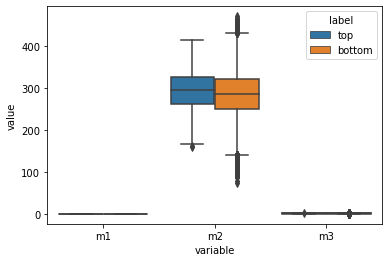

In [28]:
sns.boxplot(data=scores_df.melt('label', labs), y='value', x='variable', hue='label')

In [29]:
scores_df

,m1,m2,m3,label,z,p
0,-0.0,315.820083,0.463225,top,316.283308,0.996848
1,-0.0,375.982824,0.234555,top,376.217380,0.997349
2,-0.0,297.685111,0.427533,top,298.112644,0.996657
3,-0.0,322.774953,0.139322,top,322.914275,0.996913
4,-0.0,216.395746,0.779545,top,217.175291,0.995417
...,...,...,...,...,...,...
120091,-0.0,369.567390,0.009983,bottom,369.577374,0.997302
120092,-0.0,295.157108,0.511764,bottom,295.668872,0.996629
120093,-0.0,310.998631,0.427197,bottom,311.425828,0.996799
120094,-0.0,288.691351,0.547102,bottom,289.238453,0.996555


<AxesSubplot:xlabel='variable', ylabel='value'>

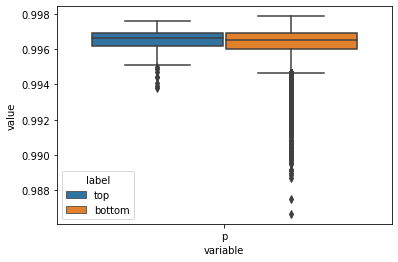

In [30]:
sns.boxplot(data=scores_df.melt('label', ['p']), y='value', x='variable', hue='label')

In [105]:
data_sample

,seq,0,1,y,log10_enrichment_r4,y_shuffled
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1,1.067134,0.30103,0.857673
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0,0.838465,-0.30103,1.108403
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1,1.031443,0.30103,0.726198
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0,0.743231,-0.30103,1.210030
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1,1.383455,0.30103,1.079164
...,...,...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0,0.613893,-0.30103,0.942717
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0,1.115673,-0.30103,0.569026
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1,1.031107,0.30103,1.335039
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0,1.151012,-0.30103,1.427892


In [31]:
data_sample['y'] = scores_mi

In [32]:
data_sample

,seq,0,1,y
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1,0.463225
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0,0.234555
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1,0.427533
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0,0.139322
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1,0.779545
...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0,0.009983
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0,0.511764
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1,0.427197
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0,0.547102


In [33]:
import numpy as np

In [34]:
data_sample['log10_enrichment_r4'] = np.log10((data_sample[1] + 1)/ (data_sample[0] + 1))

In [35]:
data_sample

,seq,0,1,y,log10_enrichment_r4
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1,0.463225,0.30103
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0,0.234555,-0.30103
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1,0.427533,0.30103
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0,0.139322,-0.30103
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1,0.779545,0.30103
...,...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0,0.009983,-0.30103
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0,0.511764,-0.30103
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1,0.427197,0.30103
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0,0.547102,-0.30103


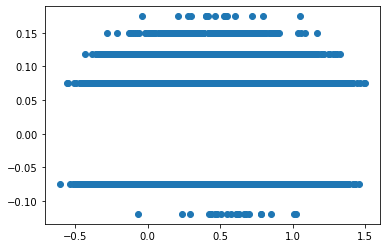

In [36]:
plt.scatter(data_sample['y'], np.log10((data_sample[1] + 1) / (data_sample[0] + 1)) * (1 / 4))

In [37]:
data_sample.sort_values(1, ascending=False)

,seq,0,1,y,log10_enrichment_r4
92208,TATTCCATGTAGACCGGCCATTGGACTATG,0,4,0.602114,0.69897
35936,CCCTAGCGTTGATGGTATCGTAAGTGCGTC,0,4,0.277739,0.69897
85183,TAATTAGTGGCTGCTTGTCGGAATGGGCAG,0,4,0.465146,0.69897
54302,GAGGGGGCGTTACGCGTTGTGTAGACCTAA,0,4,0.413500,0.69897
15952,AGGACCTCAGGTGGAATCTTTTTACTATTG,0,4,0.295411,0.69897
...,...,...,...,...,...
22308,ATATCAGAGAGACAGGACTTGTGACTTTGT,1,0,0.372564,-0.30103
22309,ATATCAGAGGGCGTTCGAGGCTTGCTAGGC,1,0,0.757506,-0.30103
65647,GGATGGGAGTGCCTTTTGGATGAAAGATTG,1,0,0.346593,-0.30103
65643,GGATGGCTTGAGTAACCAAGGATTGCGTGG,1,0,0.315938,-0.30103


In [38]:
data_sample['y'] += abs(data_sample['y'].min())

In [39]:
data_sample.sort_values('y', ascending=False)

,seq,0,1,y,log10_enrichment_r4
79488,GTGGTAGGCGCGCGCGCGCGGGGCGGGGCG,0,1,2.100064,0.30103
20960,ATAAGCCACGCGGGGGGGGCCGCGAGTAAG,0,1,2.095523,0.30103
41236,CGGCGAGGGGGCGCCGCGCTCGGGCCTGCA,0,1,2.066888,0.30103
66805,GGCGCATGGGGGGCGCGTCGCGGGGGGGGT,1,0,2.059853,-0.30103
103457,TGCTGCCGCGCGGCGGTGGCGCGCCGTTAC,0,1,2.045624,0.30103
...,...,...,...,...,...
32679,CAGTGATTCTAAAAATAAATAAATGCCCGC,1,0,0.087256,-0.30103
105662,TGGGTCATATAAATATAATTTTAAGTTCAG,1,0,0.066002,-0.30103
108155,TGTGATATAATTAATTTTATAAAGTACTCG,0,1,0.053957,0.30103
77638,GTCTTATTATTATAAATTGTATTTACATGT,0,1,0.047421,0.30103


In [60]:
y_shuffled = np.array(data_sample['y'])
np.random.shuffle(y_shuffled)


In [93]:
data_sample['y_shuffled'] = y_shuffled

In [97]:
data_sample

,seq,0,1,y,log10_enrichment_r4,y_shuffled
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1,1.067134,0.30103,0.857673
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0,0.838465,-0.30103,1.108403
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1,1.031443,0.30103,0.726198
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0,0.743231,-0.30103,1.210030
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1,1.383455,0.30103,1.079164
...,...,...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0,0.613893,-0.30103,0.942717
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0,1.115673,-0.30103,0.569026
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1,1.031107,0.30103,1.335039
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0,1.151012,-0.30103,1.427892


In [99]:
pearsonr(data_sample['y'], data_sample['log10_enrichment_r4']), pearsonr(data_sample['y'], data_sample['y_shuffled'])

((0.06802077155998715, 3.890805695833569e-123),
 (0.002864957092114999, 0.3207884922773998))

In [69]:
kmers_table = {} # round # k
kstart = 8
kstop = kstart + 1

pseudocount = 1
for selection_round, df in zip([1, 'y', 'y_shuffled'], [data_sample, data_sample, data_sample]):
    kmer_table_by_k = {}
    for k in range(kstart, kstop): # this is also the kernel size
        print('selection round', selection_round)
        print('generating a k-mers table for k=%i' % k)
        unique_kmers = [[r['seq'][si: si + k], r[selection_round]]  for ri, r in data_sample.iterrows() for si in range(len(r['seq']) - k + 1)]
        unique_kmers += [[str(Seq(r['seq'][si: si + k]).reverse_complement()), r[selection_round]] for ri, r in data_sample.iterrows() for si in range(len(r['seq']) - k + 1)]
        # kmer_table = pd.Series(unique_kmers).value_counts()
        # kmer_prob = kmer_table / kmer_table.sum()
        kmer_table = pd.DataFrame(unique_kmers, columns=['kmer', 'counts'])
        kmer_table = kmer_table.groupby('kmer').sum().sort_values('counts', ascending=False)
        kmer_table['prob'] = kmer_table['counts'] / kmer_table['counts'].sum()
        kmer_table['round'] = selection_round
        kmer_table_by_k[k] = kmer_table
    kmers_table[selection_round] = kmer_table_by_k

selection round 1
generating a k-mers table for k=8
selection round y
generating a k-mers table for k=8
selection round y_shuffled
generating a k-mers table for k=8


In [100]:
data_sample

,seq,0,1,y,log10_enrichment_r4,y_shuffled
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1,1.067134,0.30103,0.857673
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0,0.838465,-0.30103,1.108403
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1,1.031443,0.30103,0.726198
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0,0.743231,-0.30103,1.210030
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1,1.383455,0.30103,1.079164
...,...,...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0,0.613893,-0.30103,0.942717
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0,1.115673,-0.30103,0.569026
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1,1.031107,0.30103,1.335039
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0,1.151012,-0.30103,1.427892


In [71]:
sum(kmers_table['y'][kstart]['counts'])

5845839.1516182935

In [72]:
sum(kmers_table[1][kstart]['counts'])

2377602

In [73]:
sum(kmers_table['y_shuffled'][kstart]['counts'])

5845839.151618452

In [103]:
kmers_table['y_shuffled'][kstart].reindex(kmers_table['y'][kstart].index)

,counts,prob,round
kmer,,,
CGCCCCCT,1416.139635,0.000242,y_shuffled
AGGGGGCG,1416.139635,0.000242,y_shuffled
GCGCCCCC,1210.305419,0.000207,y_shuffled
GGGGGCGC,1210.305419,0.000207,y_shuffled
GCCCCCTA,1060.198844,0.000181,y_shuffled
...,...,...,...
GAGATAAT,53.808724,0.000009,y_shuffled
GGATAATC,46.957399,0.000008,y_shuffled
GATTATCC,46.957399,0.000008,y_shuffled


In [104]:
kmers_table['y'][kstart].reindex(kmers_table['y'][kstart].index)

,counts,prob,round
kmer,,,
CGCCCCCT,1790.552764,0.000306,y
AGGGGGCG,1790.552764,0.000306,y
GCGCCCCC,1567.732529,0.000268,y
GGGGGCGC,1567.732529,0.000268,y
GCCCCCTA,1278.130216,0.000219,y
...,...,...,...
GAGATAAT,39.761982,0.000007,y
GGATAATC,39.739514,0.000007,y
GATTATCC,39.739514,0.000007,y


0.7622091872700822


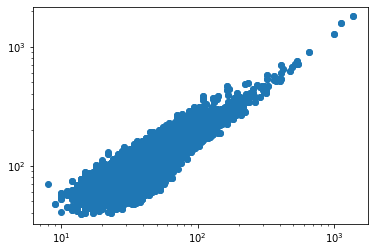

In [75]:
merged = kmers_table[1][kstart].merge(kmers_table['y'][kstart], left_index=True, right_index=True)
merged.head()
x, y = merged['counts_x'], merged['counts_y']
from scipy.stats import pearsonr
ax = plt.subplot()
plt.scatter(merged['counts_x'], merged['counts_y'])
ax.set_yscale('log')
ax.set_xscale('log')
print(pearsonr(x, y)[0] ** 2)

In [83]:
merged

,counts_x,prob_x,round_x,counts_y,prob_y,round_y
kmer,,,,,,
AGGGGGCG,1370,0.000576,1,1416.139635,0.000242,y_shuffled
CGCCCCCT,1370,0.000576,1,1416.139635,0.000242,y_shuffled
GGGGGCGC,1124,0.000473,1,1210.305419,0.000207,y_shuffled
GCGCCCCC,1124,0.000473,1,1210.305419,0.000207,y_shuffled
GCCCCCTA,996,0.000419,1,1060.198844,0.000181,y_shuffled
...,...,...,...,...,...,...
GTCGATGA,10,0.000004,1,56.200155,0.000010,y_shuffled
CCGGATTC,10,0.000004,1,47.289497,0.000008,y_shuffled
TCCGGCAT,9,0.000004,1,46.204240,0.000008,y_shuffled


In [91]:
kmers_table['y_shuffled'][kstart]

,counts,prob,round
kmer,,,
AGGGGGCG,1416.139635,0.000242,y_shuffled
CGCCCCCT,1416.139635,0.000242,y_shuffled
GCGCCCCC,1210.305419,0.000207,y_shuffled
GGGGGCGC,1210.305419,0.000207,y_shuffled
TAGGGGGC,1060.198844,0.000181,y_shuffled
...,...,...,...
GAACTTCT,43.196515,0.000007,y_shuffled
AGGATCTG,43.157010,0.000007,y_shuffled
CAGATCCT,43.157010,0.000007,y_shuffled


In [89]:
kmers_table[1][kstart]

,counts,prob,round
kmer,,,
AGGGGGCG,1370,0.000576,1
CGCCCCCT,1370,0.000576,1
GGGGGCGC,1124,0.000473,1
GCGCCCCC,1124,0.000473,1
GCCCCCTA,996,0.000419,1
...,...,...,...
GTCGATGA,10,0.000004,1
CCGGATTC,10,0.000004,1
TCCGGCAT,9,0.000004,1


In [86]:
merged_y = kmers_table['y'][kstart].merge(kmers_table['y_shuffled'][kstart], left_index=True, right_index=True)
merged_y
x, y = merged['counts_x'], merged['counts_y']
print(pearsonr(x, y)[0] ** 2)

0.7944843998410795


shuffled data
0.7944843998410795


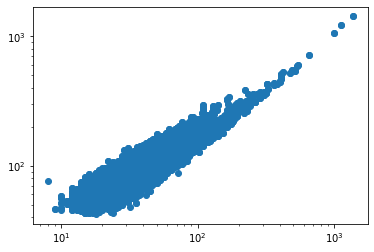

In [87]:
print('shuffled data')
merged = kmers_table[1][kstart].merge(kmers_table['y_shuffled'][kstart], left_index=True, right_index=True)
merged.head()
x, y = merged['counts_x'], merged['counts_y']
from scipy.stats import pearsonr
ax = plt.subplot()
plt.scatter(merged['counts_x'], merged['counts_y'])
ax.set_yscale('log')
ax.set_xscale('log')
print(pearsonr(x, y)[0] ** 2)

In [77]:
np.arange(len(data_sample)) // 1000

array([  0,   0,   0, ..., 120, 120, 120])

In [78]:
data_sample

,seq,0,1,y,log10_enrichment_r4,y_shuffled
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1,1.067134,0.30103,0.857673
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0,0.838465,-0.30103,1.108403
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1,1.031443,0.30103,0.726198
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0,0.743231,-0.30103,1.210030
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1,1.383455,0.30103,1.079164
...,...,...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0,0.613893,-0.30103,0.942717
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0,1.115673,-0.30103,0.569026
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1,1.031107,0.30103,1.335039
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0,1.151012,-0.30103,1.427892


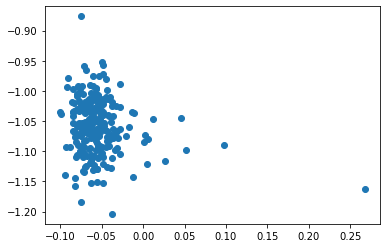

In [79]:
binned = data_sample.groupby(np.arange(len(data_sample)) // 500).mean()
plt.scatter(binned['log10_enrichment_r4'], -binned['y'])

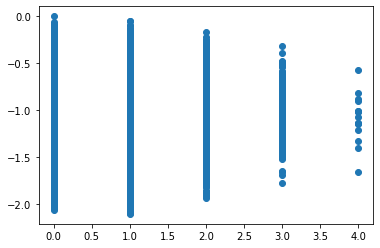

In [80]:
plt.scatter(data_sample[1], -data_sample['y'])